In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from graph_reinforcement_learning_using_blockchain_data import config
from graph_reinforcement_learning_using_blockchain_data.modeling import random_forest

config.load_dotenv()

2025-06-22 13:38:10.216 | INFO     | graph_reinforcement_learning_using_blockchain_data.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data


True

In [2]:
df_features = pd.read_csv(
    config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features_nodes_improved.csv"
)

In [3]:
df_features.head()

,account,gasUsed_mean,cumulativeGasUsed_mean,transactionIndex_min,transactionIndex_max,transactionIndex_mean,effectiveGasPrice_mean,effectiveGasPrice_max,status_mean,fee_mean,...,dummy_0x9d9af8e3_mean,dummy_0x908fb5ee_mean,dummy_0x7fcf532c_mean,dummy_0xd78ad95f_mean,dummy_0x17307eab_mean,dummy_0x8c5be1e5_mean,dummy_0xddac4093_mean,dummy_0xc42079f9_mean,dummy_0x19b47279_mean,dummy_0x8201aa3f_mean
0,0x00000000000124d994209fbB955E0217B5C2ECA1,153953.333333,2349512.5,3,39,18.833333,4.240266e+10,62912040686,1.0,6.261262e+15,...,0.0,0.0,0.5,0.500000,0.0,0.5,0.0,0.833333,0.000000,0.0
1,0x0000000000055772357E58581A2A2C5C6D9E8F64,184302.852632,2044586.4,0,94,12.789474,4.014352e+10,356581638821,1.0,7.352653e+15,...,0.0,0.0,0.0,0.515789,0.0,0.0,0.0,0.968421,0.515789,0.0
2,0x00000000000FFE26043F4C963A16612f8410A881,132305.000000,12121809.0,147,147,147.000000,2.896867e+10,28968672309,1.0,3.832700e+15,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0
3,0x0000000000d14562212733C7DA3923DFe2613603,101080.000000,21705964.0,232,232,232.000000,2.640542e+10,26405422524,1.0,2.669060e+15,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0x0000000007cB415122b0049a88bf24841260050e,46563.000000,16124385.0,166,166,166.000000,1.782762e+10,17827622923,1.0,8.301076e+14,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0


In [4]:
df = df_features.drop(
    columns=[
        "account",
        "transactionIndex_max",
        "transactionIndex_min",
        "transactionIndex_mean",
    ]
)
df.head()

,gasUsed_mean,cumulativeGasUsed_mean,effectiveGasPrice_mean,effectiveGasPrice_max,status_mean,fee_mean,account_label,num_logs_min,num_logs_max,num_logs_mean,...,dummy_0x9d9af8e3_mean,dummy_0x908fb5ee_mean,dummy_0x7fcf532c_mean,dummy_0xd78ad95f_mean,dummy_0x17307eab_mean,dummy_0x8c5be1e5_mean,dummy_0xddac4093_mean,dummy_0xc42079f9_mean,dummy_0x19b47279_mean,dummy_0x8201aa3f_mean
0,153953.333333,2349512.5,4.240266e+10,62912040686,1.0,6.261262e+15,0,3,9,5.833333,...,0.0,0.0,0.5,0.500000,0.0,0.5,0.0,0.833333,0.000000,0.0
1,184302.852632,2044586.4,4.014352e+10,356581638821,1.0,7.352653e+15,1,5,8,5.557895,...,0.0,0.0,0.0,0.515789,0.0,0.0,0.0,0.968421,0.515789,0.0
2,132305.000000,12121809.0,2.896867e+10,28968672309,1.0,3.832700e+15,0,4,4,4.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0
3,101080.000000,21705964.0,2.640542e+10,26405422524,1.0,2.669060e+15,0,3,3,3.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,46563.000000,16124385.0,1.782762e+10,17827622923,1.0,8.301076e+14,0,1,1,1.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.0


In [5]:
X = df.drop(columns=["account_label"])
y = df["account_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
features_to_scale = [
    "gasUsed_mean",
    "cumulativeGasUsed_mean",
    "effectiveGasPrice_mean",
    "effectiveGasPrice_max",
    "status_mean",
    "fee_mean",
]

In [7]:
rf_trainer = random_forest.RandomForestTrainer()
grid_search = rf_trainer.grid_search(features_to_scale)

In [8]:
best_model = rf_trainer.train(X_train, X_test, y_train, y_test, grid_search, "Node Classification")

2025/05/31 13:01:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data/venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.3s
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   3.8s
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   3.9s
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   3.9s
[CV] END classifier__max_depth=20, clas

2025/05/31 13:03:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data/venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).
"
2025/05/31 13:03:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data/ve

🏃 View run masked-sheep-12 at: http://127.0.0.1:8080/#/experiments/240524402154184558/runs/ab71a05ff7904af383ae1c7a2a7a50cb
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/240524402154184558
🏃 View run wise-turtle-516 at: http://127.0.0.1:8080/#/experiments/240524402154184558/runs/424858066a0d4a84a7629939def9f9d1
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/240524402154184558
🏃 View run rogue-bat-638 at: http://127.0.0.1:8080/#/experiments/240524402154184558/runs/434095a11d0d499ca0aa8db812c6fea3
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/240524402154184558
🏃 View run rumbling-lamb-70 at: http://127.0.0.1:8080/#/experiments/240524402154184558/runs/5b6aa0ce864c43e082afcc3f0bd8d0b4
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/240524402154184558
🏃 View run magnificent-fish-503 at: http://127.0.0.1:8080/#/experiments/240524402154184558/runs/039adcd0cb604fa8ac446945304ecdc7
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/2405244021

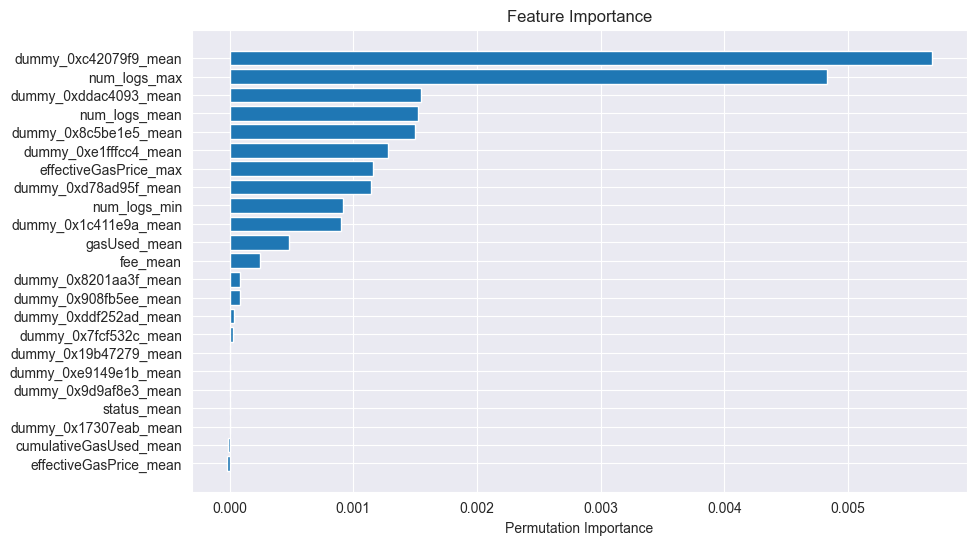

In [9]:
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()